In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from IPython.display import display,HTML

fastai's Layered API

In [3]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [4]:
path = untar_data(URLs.IMDB)
dls = DataBlock(
    blocks=(TextBlock.from_folder(path),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path)

Transforms

In [5]:
files = get_text_files(path, folders = ['train', 'test'])
txts = L(o.open().read() for o in files[:2000])

In [6]:
tok = Tokenizer.from_folder(path)
tok.setup(txts)
toks = txts.map(tok)
toks[0]

(#746) ['xxbos','i','rented','this','movie',',','after','hearing','xxmaj','chris'...]

In [7]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10]

TensorText([   2,   17,  996,   20,   26,   11,  124, 2268,    8, 1493])

In [8]:
nums_dec = num.decode(nums[0][:10]); nums_dec

(#10) ['xxbos','i','rented','this','movie',',','after','hearing','xxmaj','chris']

In [9]:
tok.decode(nums_dec)

'xxbos i rented this movie , after hearing xxmaj chris'

In [10]:
tok((txts[0], txts[1]))

((#746) ['xxbos','i','rented','this','movie',',','after','hearing','xxmaj','chris'...],
 (#254) ['xxbos','xxmaj','some','of','the','reviewers','of','this','film','were'...])

Writing a transform

In [11]:
def f(x:int): return x+1
tfm = Transform(f)
tfm(2),tfm(2.0)

(3, 2.0)

In [12]:
@Transform
def f(x:int): return x+1
f(2),f(2.0)

(3, 2.0)

In [13]:
class NormalizeMean(Transform):
    def setups(self, items): self.mean = sum(items)/len(items)
    def encodes(self, x): return x-self.mean
    def decodes(self, x): return x+self.mean

In [14]:
tfm = NormalizeMean()
tfm.setup([1,2,3,4,5])
start = 2
y = tfm(start)
z = tfm.decode(y)
tfm.mean,y,z

(3.0, -1.0, 2.0)

Pipeline

In [15]:
tfms = Pipeline([tok, num])
t = tfms(txts[0]); t[:20]

TensorText([   2,   17,  996,   20,   26,   11,  124, 2268,    8, 1493,    8,  480,  543,  143,   15,    9,  862,   14,   22,  630])

In [16]:
tfms.decode(t)[:100]

'xxbos i rented this movie , after hearing xxmaj chris xxmaj gore saying something to the effect of "'

TfmdLists and Datasets: Transformed Collections

TfmdLists

In [17]:
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize])

In [18]:
t = tls[0]; t[:20]

TensorText([   2,   19, 1588,   20,   30,   11,  120, 2283,    8, 1454,    8,  617,  663,  160,   15,    9,  924,   14,   22,  750])

In [19]:
tls.decode(t)[:100]

'xxbos i rented this movie , after hearing xxmaj chris xxmaj gore saying something to the effect of "'

In [20]:
tls.show(t)

xxbos i rented this movie , after hearing xxmaj chris xxmaj gore saying something to the effect of " five stars ! " on that xxmaj attack of the xxmaj show show . xxmaj well when i turned around the xxup dvd and it showed the 3 stages of hell , well i had to buy it . xxmaj just to see the spectacle of a mother yelling at her son to drop her other son into a flaming pit . 

 i was n't expecting xxup ecw or xxup xxunk for an hour and eighteen minutes , but i was expecting at least a summarized version of what seemed to be the main highlight of this movie . xxmaj well sadly there was n't anything like that . xxmaj the 3 stages of death part happens right from the beginning , and its pretty much downhill from there . xxmaj nothing really happens in this documentary . xxmaj it was pretty raw , bare and unbiased . xxmaj not a bad thing , but there is a narrator in this one . xxmaj you 'd expect him to have opinions on the subject of this documentary , but he does n't . xxmaj which would of be

In [21]:
cut = int(len(files)*0.8)
splits = [list(range(cut)), list(range(cut,len(files)))]
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize],
                splits=splits)

In [22]:
tls.valid[0][:20]

TensorText([   2,    8,   20,   32,   25,  207,   68,   10,   19,  259,   38,  118,  220,   13,  359,   14, 2868,   11,   31,   20])

In [23]:
lbls = files.map(parent_label)
lbls

(#50000) ['neg','neg','neg','neg','neg','neg','neg','neg','neg','neg'...]

In [24]:
cat = Categorize()
cat.setup(lbls)
cat.vocab, cat(lbls[0])

(['neg', 'pos'], TensorCategory(0))

In [25]:
tls_y = TfmdLists(files, [parent_label, Categorize()])
tls_y[0]

TensorCategory(0)

Datasets

In [26]:
x_tfms = [Tokenizer.from_folder(path), Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms])
x,y = dsets[0]
x[:20],y

(TensorText([   2,   19, 1588,   20,   30,   11,  120, 2283,    8, 1454,    8,  617,  663,  160,   15,    9,  924,   14,   22,  750]),
 TensorCategory(0))

In [27]:
x_tfms = [Tokenizer.from_folder(path), Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms], splits=splits)
x,y = dsets.valid[0]
x[:20],y


(TensorText([   2,    8,   20,   32,   25,  207,   68,   10,   19,  259,   38,  118,  220,   13,  359,   14, 2868,   11,   31,   20]),
 TensorCategory(1))

In [28]:
t = dsets.valid[0]
dsets.decode(t)

('xxbos xxmaj this film was pretty good . i am not too big a fan of baseball , but this is a movie that was made to help understand the meaning of love , determination , heart , etc . \n\n xxmaj danny xxmaj glover , xxmaj joseph gordon - levitt , xxmaj brenda xxmaj fricker , xxmaj christopher xxmaj lloyd , xxmaj tony xxmaj danza , and xxmaj milton xxmaj davis xxmaj jr . are brought in with a variety of talented actors and understanding of the sport . xxmaj the plot was believable , and i love the message . xxmaj william xxmaj dear and the guys put together a great movie . \n\n xxmaj most sports films revolve around true stories or events , and they often do not work well . xxmaj but this film hits a 10 on the perfectness scale , even though there were a few minor mistakes here and there . \n\n 10 / 10',
 'pos')

In [29]:
dls = dsets.dataloaders(bs=64, before_batch=pad_input)

In [30]:
tfms = [[Tokenizer.from_folder(path), Numericalize], [parent_label, Categorize]]
files = get_text_files(path, folders = ['train', 'test'])
splits = GrandparentSplitter(valid_name='test')(files)
dsets = Datasets(files, tfms, splits=splits)
dls = dsets.dataloaders(dl_type=SortedDL, before_batch=pad_input)

In [31]:
path = untar_data(URLs.IMDB)
dls = DataBlock(
    blocks=(TextBlock.from_folder(path),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path)

Applying the Mid-Level Data API: SiamesePair

In [32]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

In [33]:
class SiameseImage(fastuple):
    def show(self, ctx=None, **kwargs):
        img1,img2,same_breed = self
        if not isinstance(img1, Tensor):
            if img2.size != img1.size: img2 = img2.resize(img1.size)
            t1,t2 = tensor(img1),tensor(img2)
            t1,t2 = t1.permute(2,0,1),t2.permute(2,0,1)
        else: t1,t2 = img1,img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,line,t2], dim=2),
                          title=same_breed, ctx=ctx)

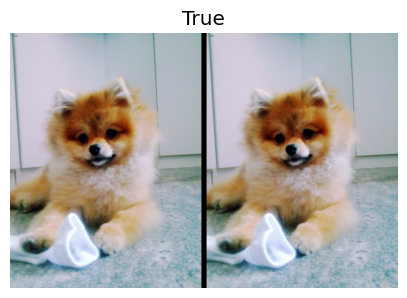

In [34]:
img = PILImage.create(files[0])
s = SiameseImage(img, img, True)
s.show();

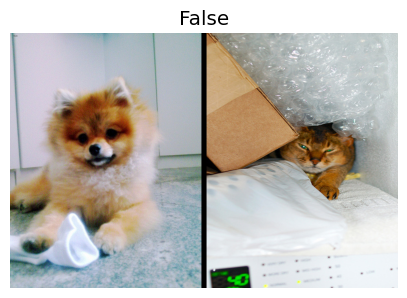

In [35]:
img1 = PILImage.create(files[1])
s1 = SiameseImage(img, img1, False)
s1.show();

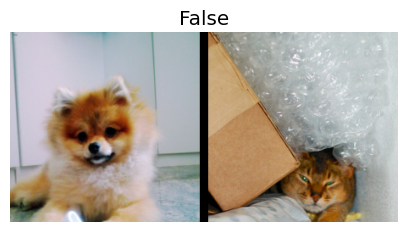

In [36]:
s2 = Resize(224)(s1)
s2.show();

In [37]:
def label_func(fname):
    return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]

In [38]:
class SiameseTransform(Transform):
    def __init__(self, files, label_func, splits):
        self.labels = files.map(label_func).unique()
        self.lbl2files = {l: L(f for f in files if label_func(f) == l)
                          for l in self.labels}
        self.label_func = label_func
        self.valid = {f: self._draw(f) for f in files[splits[1]]}

    def encodes(self, f):
        f2,t = self.valid.get(f, self._draw(f))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, t)

    def _draw(self, f):
        same = random.random() < 0.5
        cls = self.label_func(f)
        if not same:
            cls = random.choice(L(l for l in self.labels if l != cls))
        return random.choice(self.lbl2files[cls]),same

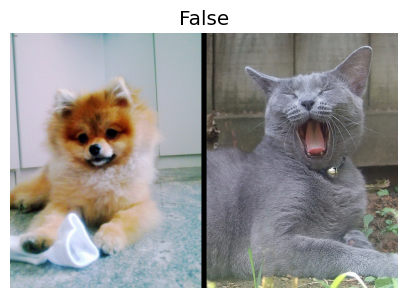

In [39]:
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, label_func, splits)
tfm(files[0]).show();

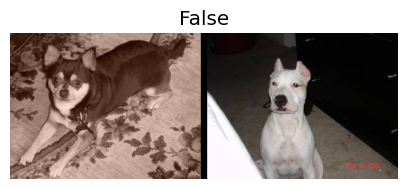

In [40]:
tls = TfmdLists(files, tfm, splits=splits)
show_at(tls.valid, 0);

In [41]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],
    after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

# **Conclusion**

fastai provides a layered API. It takes one line of code to grab the data when it's in one of the usual settings, making it easy for beginners to focus on training a model without spending too much time assembling the data. Then, the high-level data block API gives you more flexibility by allowing you to mix and match some building blocks. Underneath it, the mid-level API gives you greater flexibility to apply any transformations on your items. In your real-world problems, this is probably what you will need to use, and we hope it makes the step of data-munging as easy as possible.